In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Data loading

In [4]:
df=pd.read_csv('/kaggle/input/flipkart-product-dataset-by-priyank-khanna/dataset.csv')

In [5]:
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights,image_links
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...,https://rukminim1.flixcart.com/image/612/612/x...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...,https://rukminim1.flixcart.com/image/612/612/x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g,https://rukminim1.flixcart.com/image/612/612/x...
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g,https://rukminim1.flixcart.com/image/612/612/k...
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...,https://rukminim1.flixcart.com/image/612/612/j...
...,...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,₹380,₹999,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,NaN,https://rukminim1.flixcart.com/image/612/612/x...
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,₹179,₹299,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...,https://rukminim1.flixcart.com/image/612/612/k...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,₹354,₹600,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...,https://rukminim1.flixcart.com/image/612/612/k...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,₹498,₹599,Foodie Puppies Group,4.5,NaN,For Fish Flavor: NA Food Type: Dry Suitable Fo...,https://rukminim1.flixcart.com/image/612/612/j...


In [6]:
df.info

<bound method DataFrame.info of                    category_1    category_2          category_3  \
0      Sports, Books and More        Sports            Cricket    
1      Sports, Books and More        Sports            Cricket    
2      Sports, Books and More        Sports            Cricket    
3      Sports, Books and More        Sports            Cricket    
4      Sports, Books and More        Sports            Cricket    
...                       ...           ...                 ...   
12036      Home and Furniture  Pet Supplies  Fish and Aquatics    
12037      Home and Furniture  Pet Supplies  Fish and Aquatics    
12038      Home and Furniture  Pet Supplies  Fish and Aquatics    
12039      Home and Furniture  Pet Supplies  Fish and Aquatics    
12040      Home and Furniture  Pet Supplies  Fish and Aquatics    

                                                   title  product_rating  \
0      ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...             4.4   
1      ITWO

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_1      12041 non-null  object 
 1   category_2      12041 non-null  object 
 2   category_3      12041 non-null  object 
 3   title           12023 non-null  object 
 4   product_rating  11961 non-null  float64
 5   selling_price   12013 non-null  object 
 6   mrp             11666 non-null  object 
 7   seller_name     11825 non-null  object 
 8   seller_rating   11827 non-null  float64
 9   description     5021 non-null   object 
 10  highlights      6560 non-null   object 
 11  image_links     12041 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.1+ MB


In [8]:
df.describe()

,product_rating,seller_rating
count,11961.000000,11827.000000
mean,4.061617,4.394538
std,0.345575,0.404288
min,1.000000,3.000000
25%,3.900000,4.100000
50%,4.100000,4.400000
75%,4.300000,4.700000
max,5.000000,5.000000


remove products without mrp and selling price

In [9]:
df = df.dropna(subset=['mrp', 'selling_price'], how='all')
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights,image_links
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...,https://rukminim1.flixcart.com/image/612/612/x...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...,https://rukminim1.flixcart.com/image/612/612/x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g,https://rukminim1.flixcart.com/image/612/612/x...
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g,https://rukminim1.flixcart.com/image/612/612/k...
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...,https://rukminim1.flixcart.com/image/612/612/j...
...,...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,₹380,₹999,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,NaN,https://rukminim1.flixcart.com/image/612/612/x...
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,₹179,₹299,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...,https://rukminim1.flixcart.com/image/612/612/k...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,₹354,₹600,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...,https://rukminim1.flixcart.com/image/612/612/k...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,₹498,₹599,Foodie Puppies Group,4.5,NaN,For Fish Flavor: NA Food Type: Dry Suitable Fo...,https://rukminim1.flixcart.com/image/612/612/j...


Main Category wise products****

in %

<Axes: title={'center': 'Category wise products percentage'}>

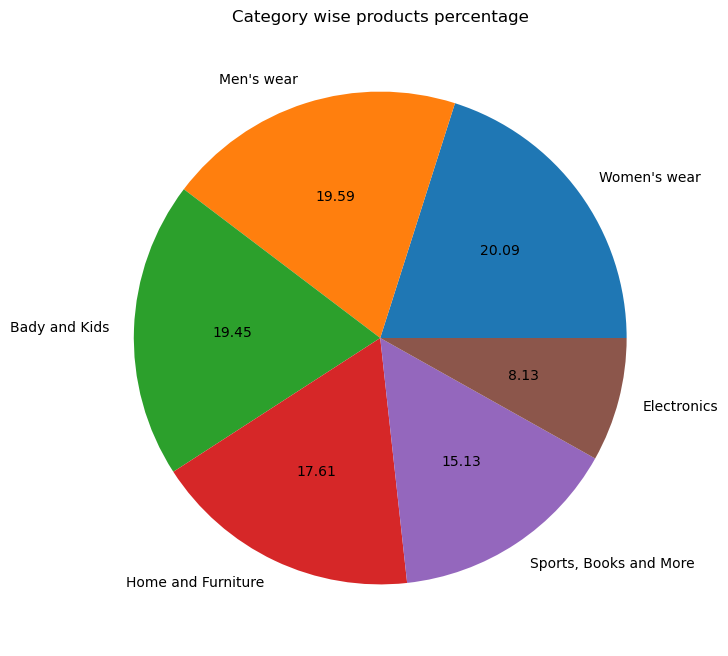

In [10]:
df['category_1'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(8,8), title='Category wise products percentage', label='')

number of products per main category

In [11]:
df['category_1'].value_counts()

Women's wear              2414
Men's wear                2353
Bady and Kids             2337
Home and Furniture        2115
Sports, Books and More    1817
Electronics                977
Name: category_1, dtype: int64

<Axes: title={'center': 'Category wise products count'}>

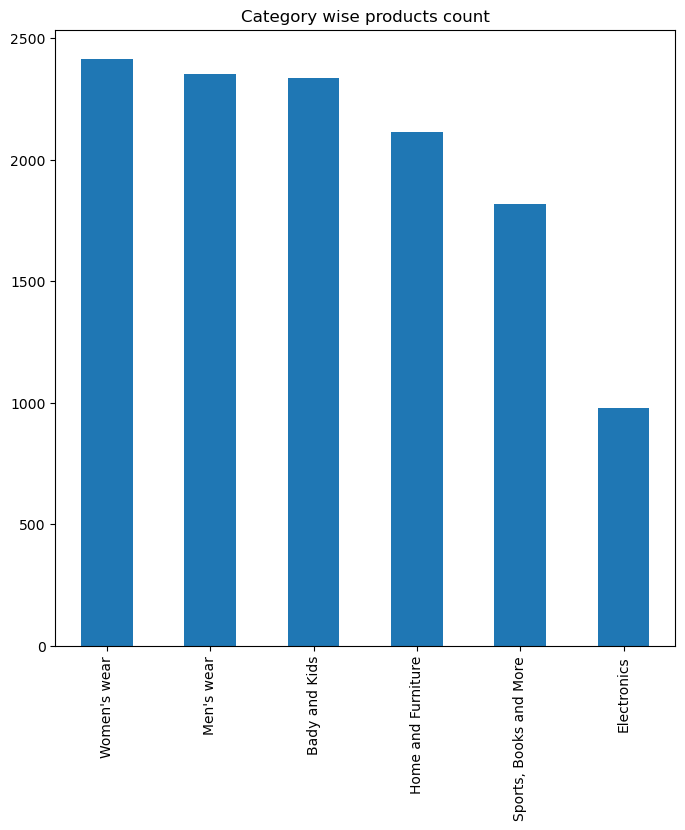

In [12]:
df['category_1'].value_counts().plot(kind='bar', figsize=(8,8), title='Category wise products count')

Category wise number of products

In [13]:
count = df.groupby('category_1')['category_2'].value_counts()
count.name = 'count'
percentage = df.groupby('category_1')['category_2'].value_counts(normalize=True).mul(100).round(1)
percentage.name = 'percentage %'
category_df = pd.concat([count, percentage], axis=1)
category_df

count  percentage %
category_1    category_2                              
Bady and Kids Baby Care              640          27.4
              Toys                   458          19.6
              Boys Clothing          200           8.6
              Girls Clothing         160           6.8
              Baby Boy Clothing      120           5.1
...                                  ...           ...
Women's wear  Party Dresses           40           1.7
              Sports Wear             40           1.7
              Swim  and Beachwear     40           1.7
              Winter Wear             40           1.7
              Watches                 22           0.9

[82 rows x 2 columns]

for category_1 in category_df.index.get_level_values(0).unique():
    sub_df = category_df.loc[category_1]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    sub_df.plot(kind='pie', y='percentage %', label='', legend=None, autopct='%.1f', ax=ax1)
    ax1.set_title(f'{category_1} - % wise category products')
    sub_df.plot(kind='bar', y='count', label='', legend=None, ax=ax2)
    ax2.set_title(f'{category_1} - count wise category products')
    plt.show()

<Axes: title={'center': 'Product Rating Count'}, xlabel='Product Rating', ylabel='Count'>

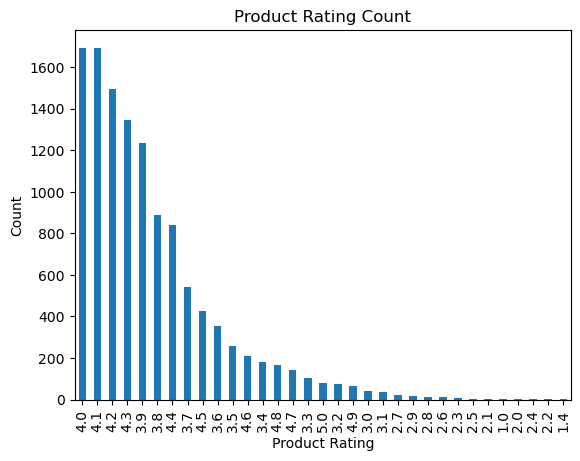

In [15]:
rating_df = df['product_rating'].value_counts()
rating_df.plot(kind='bar', y='count', xlabel='Product Rating', ylabel='Count', title='Product Rating Count' )

<Axes: title={'center': 'Category 1 wise average Rating'}, xlabel='category_1', ylabel='Average Rating'>

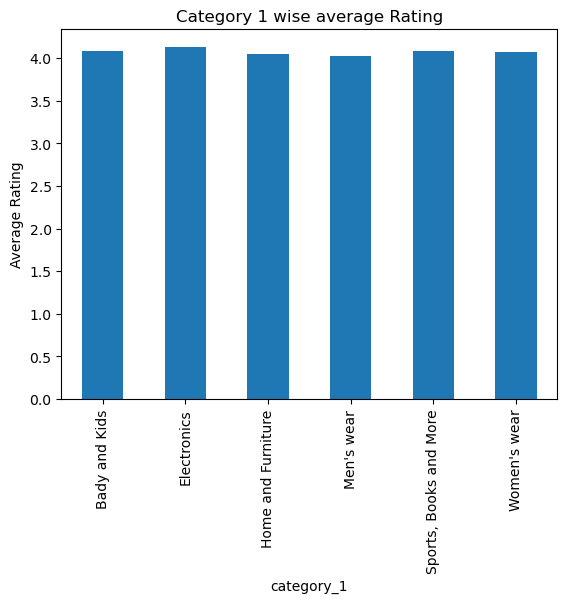

In [16]:
category_1_rating = df.groupby('category_1')['product_rating'].mean()
category_1_rating.plot(kind='bar', xlabel='category_1', ylabel='Average Rating', title='Category 1 wise average Rating' )

<Axes: title={'center': 'Category 2 wise average Rating'}, xlabel='category_2', ylabel='Average Rating'>

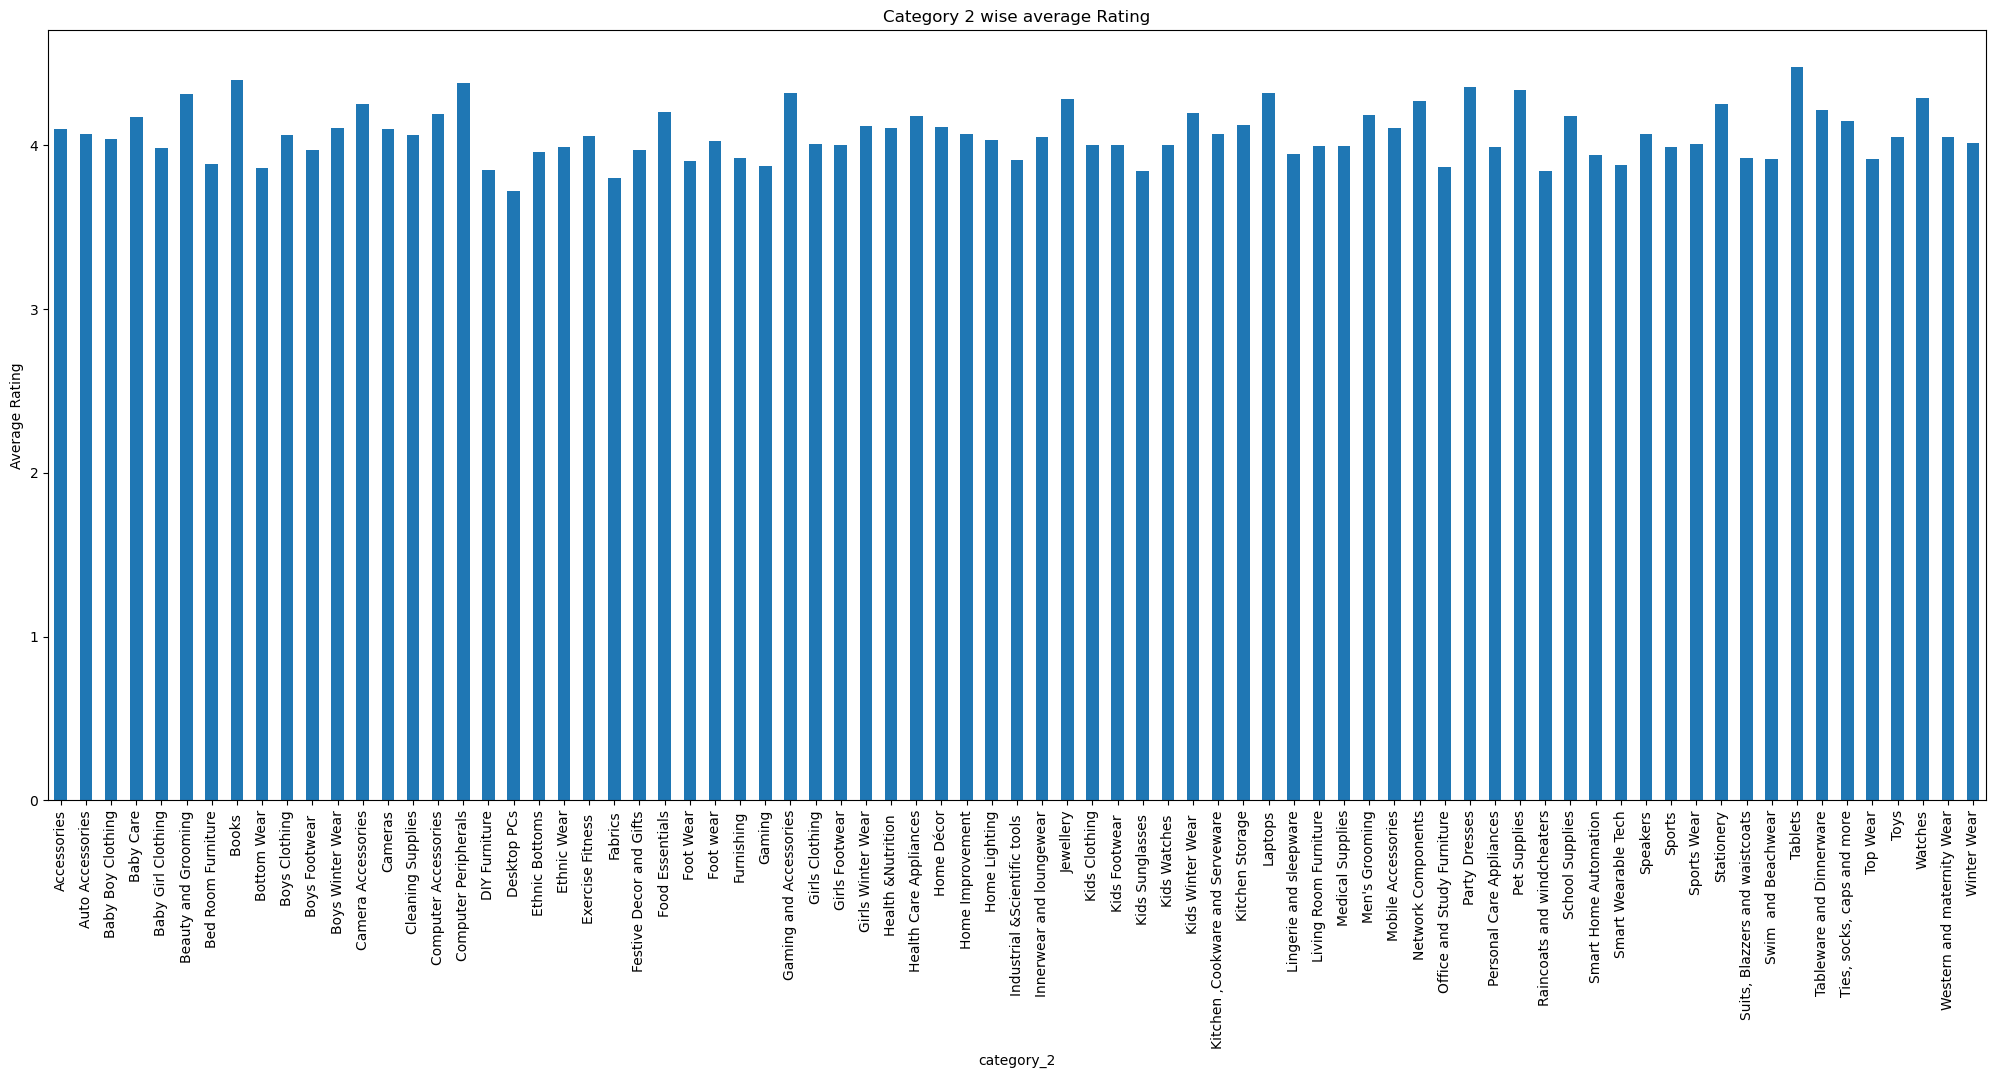

In [17]:
category_2_rating = df.groupby('category_2')['product_rating'].mean()
category_2_rating.plot(kind='bar', x='category_2', ylabel='Average Rating', title='Category 2 wise average Rating', figsize=(25,10))